# Removed headers from dataset and end rows containing text not relevant for coding (it came up with 159 rows and 8 duplicates (empty rows).

In [82]:
# Dependencies
import pandas as pd

In [83]:
# Read Excel and specific diversity tab
cultural_div_df = pd.read_excel("Resources/commonwealth electorate data.xls", sheet_name = "Table 5")

In [84]:
# Show first 5 rows
cultural_div_df.head()

,electoral_division,Aboriginal and/or Torres Strait Islander peoples,Born overseas,Recent migrants (arrived 2006-2016),Language other than English spoken at home
0,Adelaide,0.012,0.350,0.176,0.346
1,Aston,0.005,0.302,0.088,0.252
2,Ballarat,0.013,0.105,0.030,0.053
3,Banks,0.008,0.389,0.128,0.452
4,Barker,0.025,0.109,0.032,0.057


In [85]:
# Show all columns
cultural_div_df.columns

Index(['electoral_division',
       'Aboriginal and/or Torres Strait Islander peoples', 'Born overseas',
       'Recent migrants (arrived 2006-2016)',
       'Language other than English spoken at home'],
      dtype='object')

In [86]:
# Show all datatypes
cultural_div_df.dtypes

electoral_division                                   object
Aboriginal and/or Torres Strait Islander peoples    float64
Born overseas                                       float64
Recent migrants (arrived 2006-2016)                 float64
Language other than English spoken at home          float64
dtype: object

Datatypes are as expected.

In [87]:
# Checking for duplicates in divisions
cultural_div_df['electoral_division'].is_unique

True

Division names are unique / no duplicates as expected, so no cleaning required.

In [88]:
# Drop missing values and count again (INCLUDE IN REPORT: after removing text and empty rows as per step above, there were no empty cells/nans)
cultural_div_df = cultural_div_df.dropna(how="any")
len(cultural_div_df)

151

In [89]:
# Renaming columns
cultural_div_df.columns = ['electoral_division', 'aboriginal_tsi (%)', 'born_overseas (%)', 'recent_migrants (%)', 'language_home_no_english (%)']
cultural_div_df.head()

,electoral_division,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%)
0,Adelaide,0.012,0.350,0.176,0.346
1,Aston,0.005,0.302,0.088,0.252
2,Ballarat,0.013,0.105,0.030,0.053
3,Banks,0.008,0.389,0.128,0.452
4,Barker,0.025,0.109,0.032,0.057


In [90]:
# Multiply by 100 to show percentages
cultural_div_df['aboriginal_tsi (%)'] = cultural_div_df['aboriginal_tsi (%)'] * 100
cultural_div_df['born_overseas (%)'] = cultural_div_df['born_overseas (%)'] * 100
cultural_div_df['recent_migrants (%)'] = cultural_div_df['recent_migrants (%)'] * 100
cultural_div_df['language_home_no_english (%)'] = cultural_div_df['language_home_no_english (%)'] * 100

cultural_div_df.head()

,electoral_division,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%)
0,Adelaide,1.2,35.0,17.6,34.6
1,Aston,0.5,30.2,8.8,25.2
2,Ballarat,1.3,10.5,3.0,5.3
3,Banks,0.8,38.9,12.8,45.2
4,Barker,2.5,10.9,3.2,5.7


In [91]:
# Summary statistics cultural_div_df
cultural_div_df.describe()

,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%)
count,151.000000,151.000000,151.000000,151.000000
mean,2.836424,25.692715,9.521854,20.029801
std,4.219992,12.719455,6.342575,16.553347
min,0.200000,5.500000,1.100000,2.100000
25%,0.750000,13.800000,3.800000,6.150000
50%,1.700000,25.300000,8.400000,16.300000
75%,3.400000,35.250000,14.100000,28.450000
max,40.200000,53.500000,29.400000,68.600000


In [92]:
# Read in electorate division info csv
div_df = pd.read_csv("01-output_electorate_division_information/electoral_division.csv")
div_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


In [93]:
# Checking for duplicates
div_df['division_id'].is_unique

True

In [94]:
div_df.dtypes

division_id            int64
electoral_division    object
state                 object
dtype: object

In [95]:
# Summary statistics div_df
div_df.describe()

,division_id
count,150.000000
mean,188.820000
std,55.471992
min,101.000000
25%,145.250000
50%,186.500000
75%,225.750000
max,317.000000


In [96]:
# Add in division column to cultural_diversity df through left join
merged = pd.merge(cultural_div_df,
                     div_df,  
                     on ='electoral_division',  
                     how ='inner') 

merged.head()

,electoral_division,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%),division_id,state
0,Adelaide,1.2,35.0,17.6,34.6,179,SA
1,Aston,0.5,30.2,8.8,25.2,197,VIC
2,Ballarat,1.3,10.5,3.0,5.3,198,VIC
3,Banks,0.8,38.9,12.8,45.2,103,NSW
4,Barker,2.5,10.9,3.2,5.7,180,SA


In [97]:
# Delete electoral_division and state column
merged.drop(["state", "electoral_division"], axis=1, inplace=True)
merged.head()

,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%),division_id
0,1.2,35.0,17.6,34.6,179
1,0.5,30.2,8.8,25.2,197
2,1.3,10.5,3.0,5.3,198
3,0.8,38.9,12.8,45.2,103
4,2.5,10.9,3.2,5.7,180


In [103]:
# Set division_id as index
merged = merged.set_index('division_id')

In [104]:
# show datatypes
merged.dtypes

aboriginal_tsi (%)              float64
born_overseas (%)               float64
recent_migrants (%)             float64
language_home_no_english (%)    float64
dtype: object

In [105]:
len(merged)

143

In [106]:
# Show top 5 rows
merged.head()

,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%)
division_id,,,,
179,1.2,35.0,17.6,34.6
197,0.5,30.2,8.8,25.2
198,1.3,10.5,3.0,5.3
103,0.8,38.9,12.8,45.2
180,2.5,10.9,3.2,5.7


In [107]:
# Summary statistics merged
merged.describe()

,aboriginal_tsi (%),born_overseas (%),recent_migrants (%),language_home_no_english (%)
count,143.000000,143.000000,143.000000,143.000000
mean,2.903497,25.711189,9.537762,19.908392
std,4.320316,12.760547,6.392941,16.528543
min,0.200000,5.500000,1.100000,2.100000
25%,0.750000,13.800000,3.600000,5.850000
50%,1.700000,25.700000,8.700000,16.300000
75%,3.500000,35.250000,14.100000,28.450000
max,40.200000,53.500000,29.400000,68.600000


In [102]:
# export df to csv
merged.to_csv("09-output_2016_commonwealth_electoral_cultural_diversity/cultural_diversity.csv")

Exploratory analysis

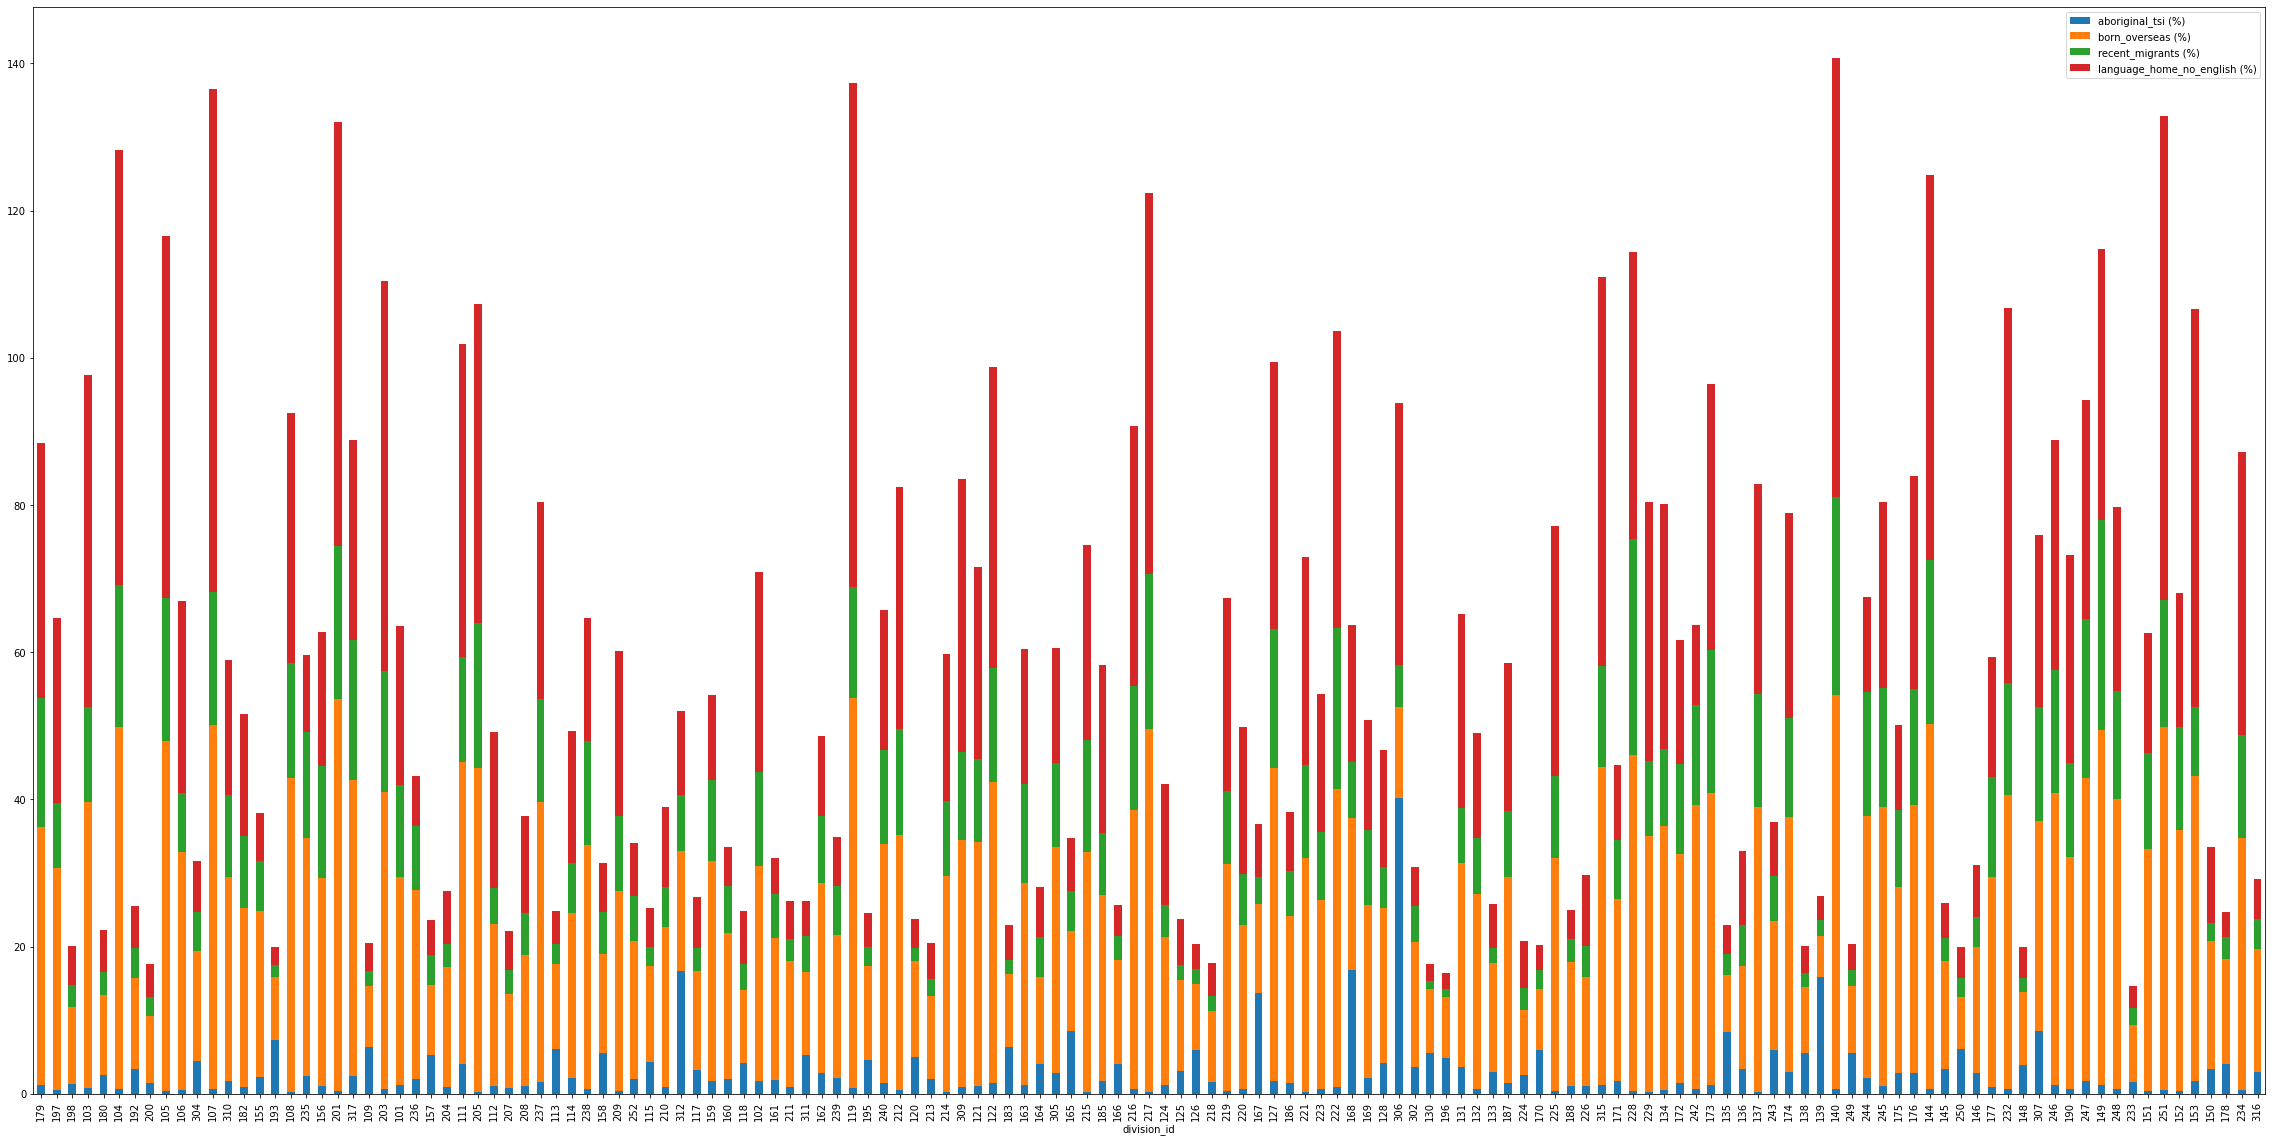

In [115]:
# Bar chart
merged.plot.bar(rot=90, stacked=True, figsize=(40,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C4B2ABE48>,
      dtype=object)

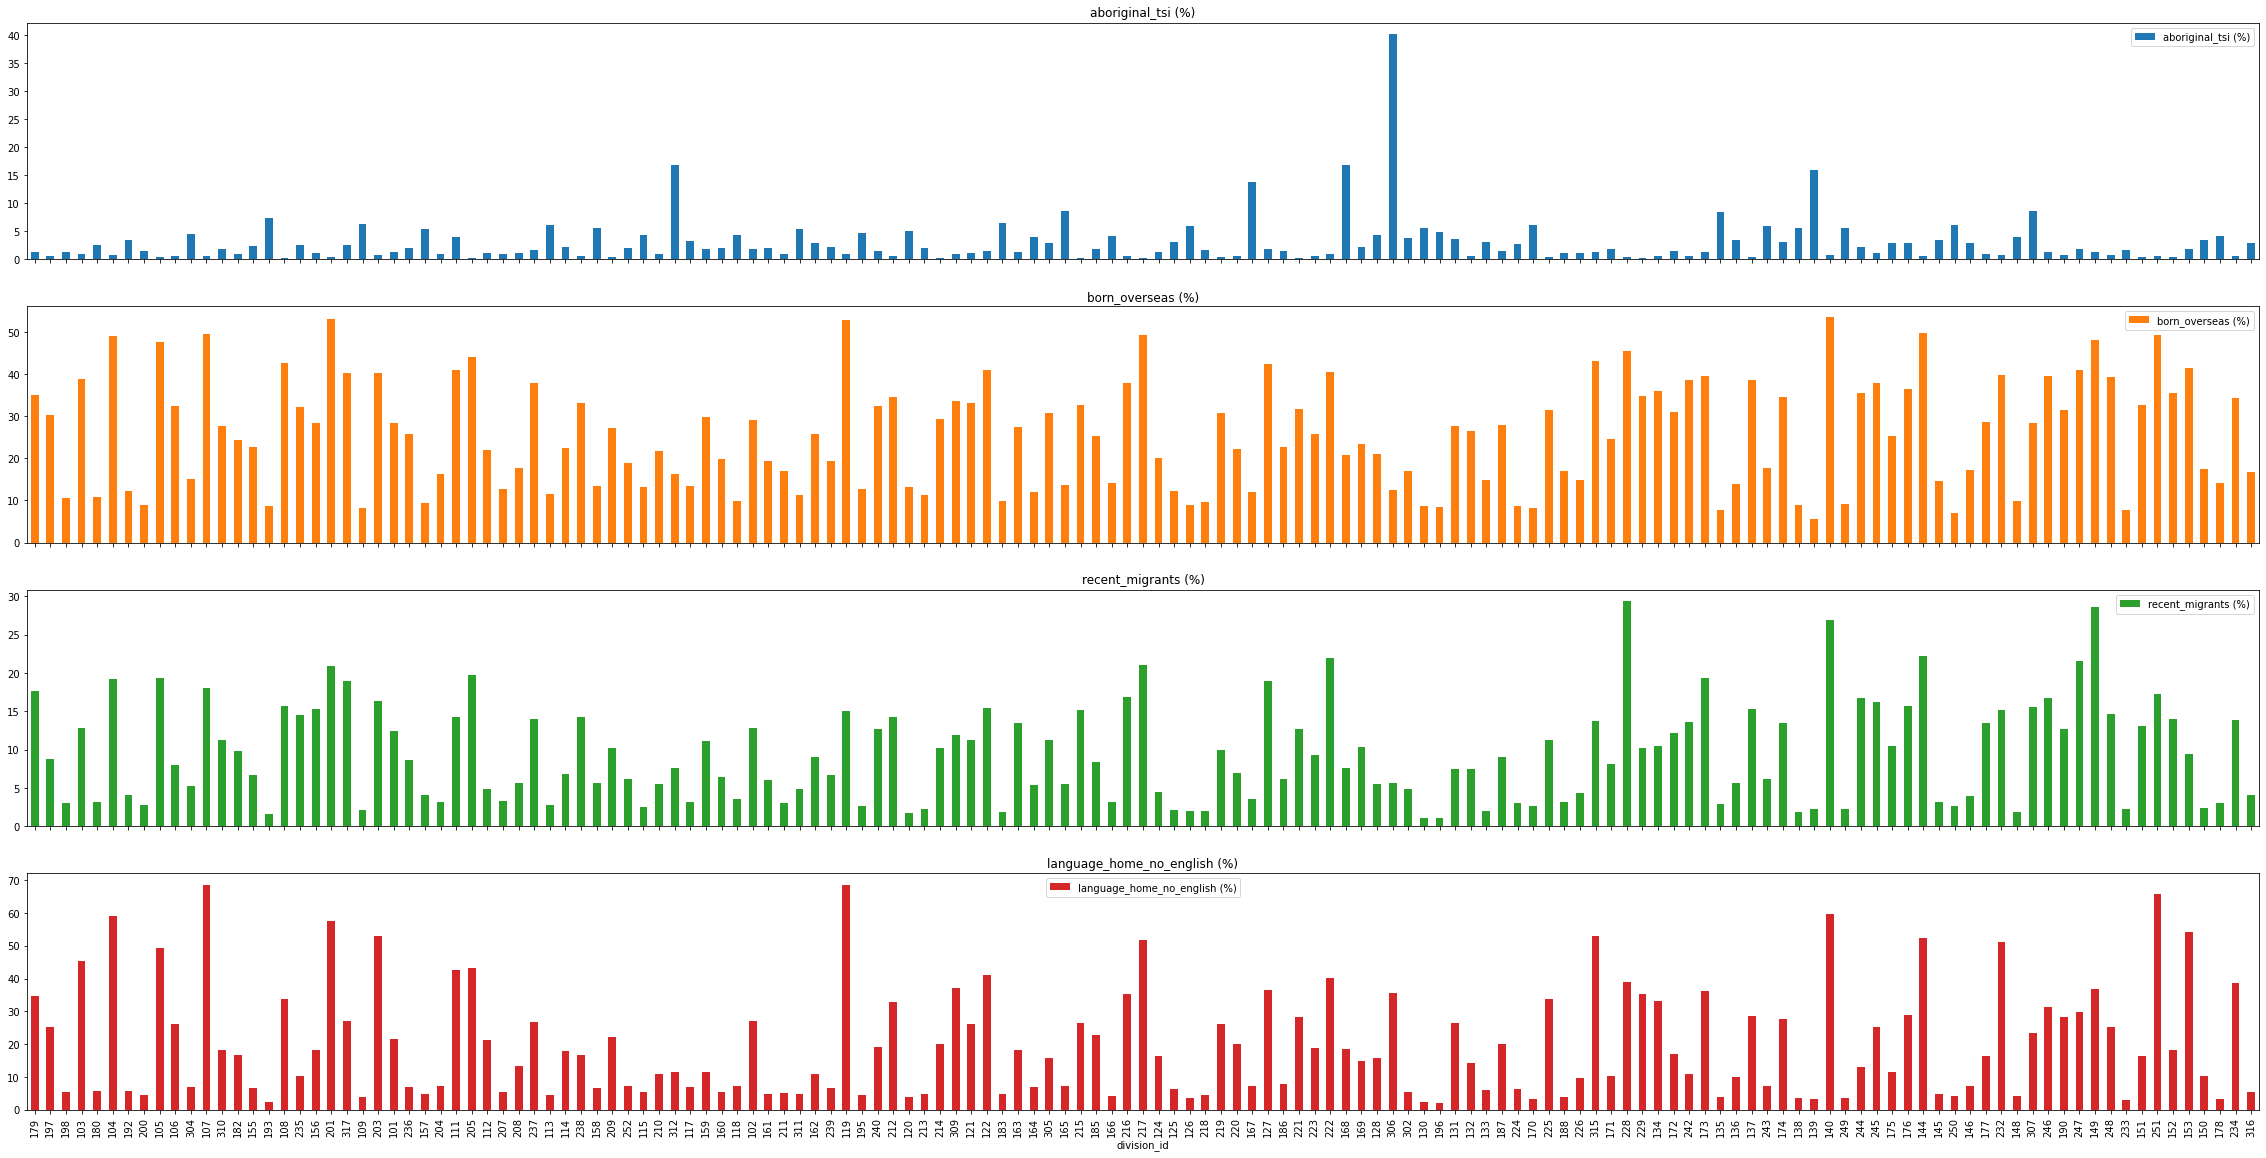

In [116]:
# Bar chart
merged.plot.bar(rot=90, subplots=True, figsize=(40,20))